### Importing Library

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Read the data frame

In [64]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Clean and exploarity the data frame

In [65]:
# statistical summary for data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [71]:
# checking for data shape
df.shape

(16598, 11)

In [72]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [73]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [74]:
df.dropna(inplace=True)

In [75]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [76]:
#  Dealing with outliers
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
IQR = Q3 - Q1

In [77]:
index = df[(df['Year'] < (Q1 - 1.5 * IQR))|(df['Year'] > (Q3 + 1.5 * IQR))].index
df.drop(index, inplace=True)

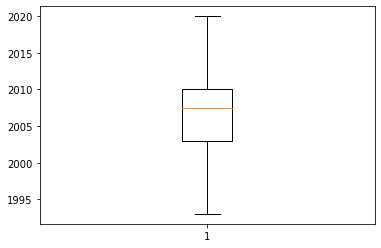

In [78]:
plt.boxplot(df['Year'])
plt.show()

In [80]:
df['Genre'].unique()

array(['Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'], dtype=object)

In [81]:
df.Platform.unique()

array(['Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'GBA', '3DS', 'PS4',
       'N64', 'PS', 'SNES', 'XB', 'PC', 'PSP', 'XOne', 'GC', 'WiiU', 'DC',
       'PSV', 'SAT', 'GEN', 'NES', 'SCD', 'WS', 'NG', 'TG16', '3DO',
       'PCFX'], dtype=object)

In [82]:
df['Genre'].value_counts()

Action          3176
Sports          2267
Misc            1675
Role-Playing    1449
Adventure       1266
Shooter         1246
Racing          1212
Simulation       841
Platform         827
Fighting         824
Strategy         663
Puzzle           540
Name: Genre, dtype: int64

In [83]:
df['Platform'].value_counts()

DS      2130
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       931
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
XOne     213
SNES     190
SAT      173
WiiU     143
GB        67
DC        52
GEN       19
NG        12
WS         6
SCD        6
NES        5
3DO        3
TG16       2
PCFX       1
Name: Platform, dtype: int64

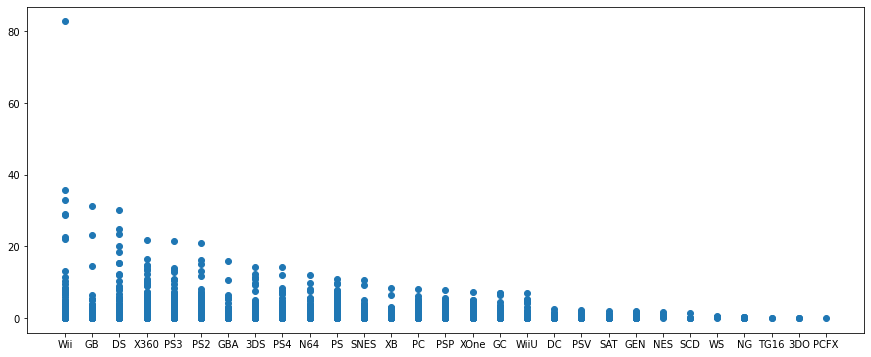

In [84]:
plt.figure(figsize=[15,6])
plt.scatter(df.Platform,df.Global_Sales)
plt.show()

In [85]:
df[df.Publisher == 'Nintendo'].max()

Rank                           16545
Name            Zangeki no Reginleiv
Platform                        WiiU
Year                          2016.0
Genre                       Strategy
Publisher                   Nintendo
NA_Sales                       41.49
EU_Sales                       29.02
JP_Sales                       10.22
Other_Sales                     8.46
Global_Sales                   82.74
dtype: object

In [87]:
df[df.Publisher == 'Konami Digital Entertainment'].max()

Rank                                   16561
Name               pro evolution soccer 2011
Platform                                XOne
Year                                  2016.0
Genre                               Strategy
Publisher       Konami Digital Entertainment
NA_Sales                                3.18
EU_Sales                                2.39
JP_Sales                                2.17
Other_Sales                             2.93
Global_Sales                            6.05
dtype: object

In [88]:
df[df.Publisher == 'Capcom'].max()

Rank                               16572
Name            X-Men vs. Street Fighter
Platform                            XOne
Year                              2016.0
Genre                           Strategy
Publisher                         Capcom
NA_Sales                            2.11
EU_Sales                            1.43
JP_Sales                            4.87
Other_Sales                         0.65
Global_Sales                         5.5
dtype: object

<AxesSubplot:xlabel='Year'>

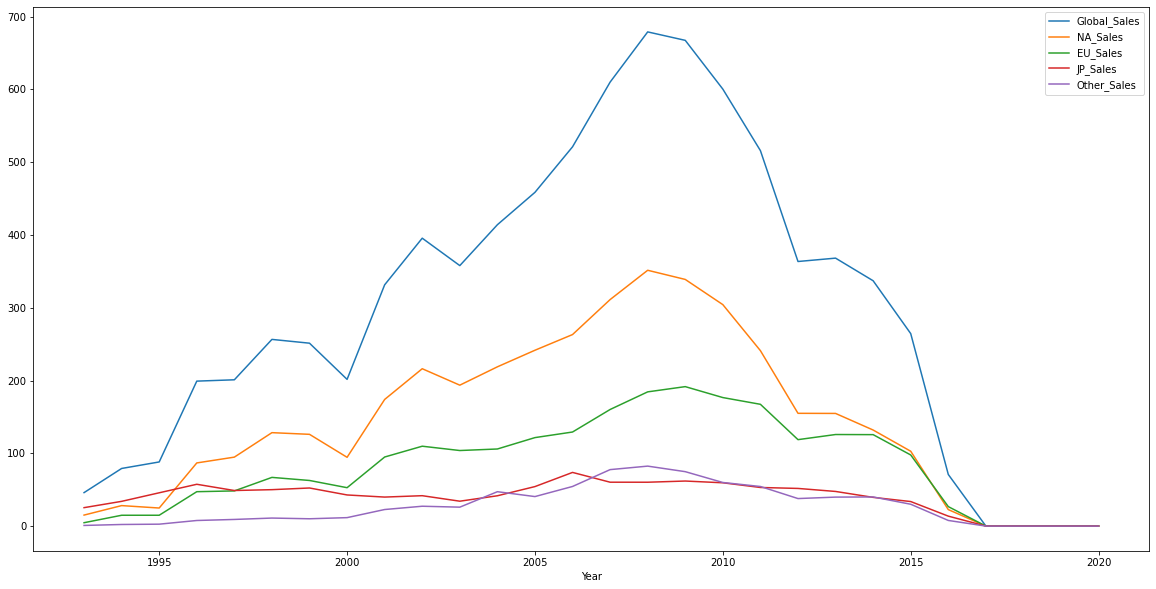

In [89]:
GSales_Year = df.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
GSales_Year.plot(figsize = (20,10))

/Users/ibrahimeid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


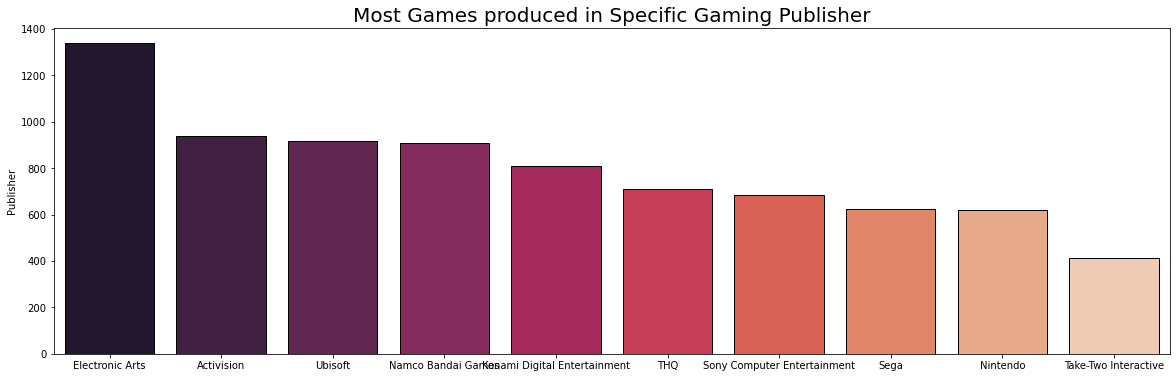

In [93]:
# plotting the most games pruduced in specific Gaming publisher
top10=df["Publisher"].value_counts().index
plt.figure(figsize = (20,6))
sns.barplot(top10[:10], df["Publisher"].value_counts().iloc[:10]
           ,palette='rocket'
           ,edgecolor='black'
           )
plt.title("Most Games produced in Specific Gaming Publisher",fontsize=20)
plt.show()

In [94]:
# correlation
corr=df.corr()
corr

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.132307,-0.433273,-0.382004,-0.254043,-0.337553,-0.434847
Year,0.132307,1.000000,-0.042070,0.009008,-0.106783,0.041201,-0.032587
NA_Sales,-0.433273,-0.042070,1.000000,0.840379,0.425737,0.705810,0.949500
EU_Sales,-0.382004,0.009008,0.840379,1.000000,0.451020,0.727893,0.934633
JP_Sales,-0.254043,-0.106783,0.425737,0.451020,1.000000,0.308597,0.594964
Other_Sales,-0.337553,0.041201,0.705810,0.727893,0.308597,1.000000,0.783057
Global_Sales,-0.434847,-0.032587,0.949500,0.934633,0.594964,0.783057,1.000000


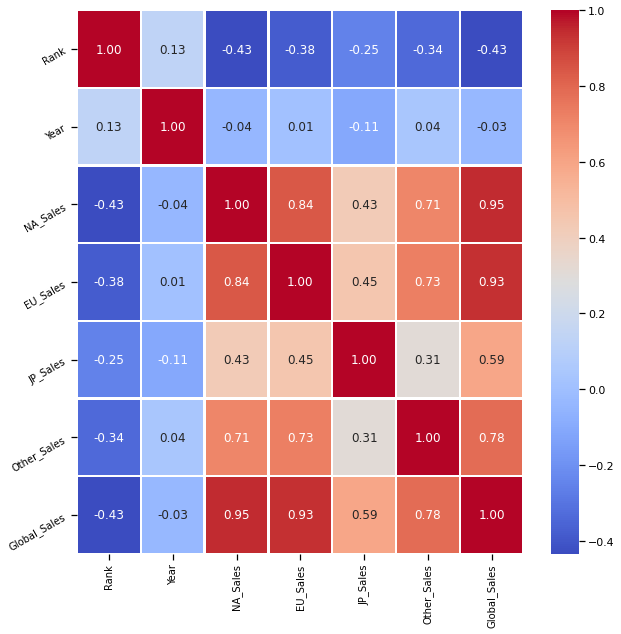

In [95]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(10,10))
p = sns.heatmap(corr, annot=True, lw=1.5, fmt='.2f', cmap='coolwarm')
rotxlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':10}, rotation=90)
rotylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':10}, rotation=30)

/Users/ibrahimeid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


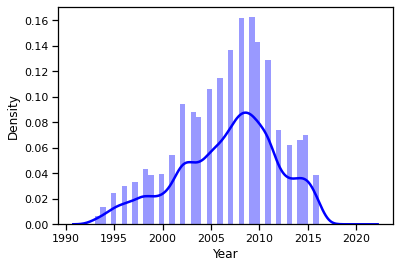

In [96]:
sns.distplot(df['Year'],kde=True,color='blue');

### Modeling

In [97]:
from sklearn.preprocessing import LabelEncoder

dff = df.copy()

le = LabelEncoder()

feature = ["Platform", "Genre", "Publisher",]


for col in feature:
    dff[col] = le.fit_transform(df[col])

In [108]:
X = dff[['Platform', 'Year', 'Genre','Publisher',"NA_Sales"]].values
y = dff['Global_Sales'].values

In [115]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [117]:
model.score(Xtest,ytest)

0.8778473275171549

In [118]:
from sklearn.linear_model import Ridge
lm_reg = Ridge(alpha=1)
lm_reg.fit(Xtrain, ytrain)
lm_reg.score(Xtest,ytest)

0.8778618261424534

In [119]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
print("Training Accuracy :", model.score(Xtrain, ytrain))
print("Testing Accuracy :", model.score(Xtest, ytest))

Training Accuracy : 0.9978711000776683
Testing Accuracy : 0.8155569999939317


In [120]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(Xtrain, ytrain)
regr.score(Xtest,ytest)

0.8637738947939101

In [123]:
import xgboost as xgb
gbm = xgb.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:squarederror",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(Xtrain,ytrain)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    Xtrain, ytrain, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=False #gives output log as below
                   )

In [124]:
fit_model.score(Xtest,ytest)

0.900210914493264